<a href="https://colab.research.google.com/github/HishitaGupta/Colab-Notebooks/blob/main/Word2Vec(PreTrained).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 87.9 MB/s eta 0:00:00


In [3]:
import gensim
from gensim.models import Word2Vec,KeyedVectors

# Semantic similarities and relations captured

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install gdown
!gdown --id 0B7XkCwpI5KDYNlNUTTlSS21pQmM


/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
From (redirected): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&confirm=t&uuid=06dd8a4a-265b-4757-9270-3b54b4125ba0
To: /content/GoogleNews-vectors-negative300.bin.gz
100% 1.65G/1.65G [00:53<00:00, 30.9MB/s]


In [6]:
!mkdir -p /content/drive/MyDrive/GoogleNews
!mv GoogleNews-vectors-negative300.bin.gz /content/drive/MyDrive/GoogleNews/


In [7]:
model = KeyedVectors.load_word2vec_format(
    '/content/drive/MyDrive/GoogleNews/GoogleNews-vectors-negative300.bin.gz',
    binary=True,
    limit=500000  # adjust based on your RAM
)

# 30 lakh words

In [8]:
model['man'] # 300 features

array([ 0.32617188,  0.13085938,  0.03466797, -0.08300781,  0.08984375,
       -0.04125977, -0.19824219,  0.00689697,  0.14355469,  0.0019455 ,
        0.02880859, -0.25      , -0.08398438, -0.15136719, -0.10205078,
        0.04077148, -0.09765625,  0.05932617,  0.02978516, -0.10058594,
       -0.13085938,  0.001297  ,  0.02612305, -0.27148438,  0.06396484,
       -0.19140625, -0.078125  ,  0.25976562,  0.375     , -0.04541016,
        0.16210938,  0.13671875, -0.06396484, -0.02062988, -0.09667969,
        0.25390625,  0.24804688, -0.12695312,  0.07177734,  0.3203125 ,
        0.03149414, -0.03857422,  0.21191406, -0.00811768,  0.22265625,
       -0.13476562, -0.07617188,  0.01049805, -0.05175781,  0.03808594,
       -0.13378906,  0.125     ,  0.0559082 , -0.18261719,  0.08154297,
       -0.08447266, -0.07763672, -0.04345703,  0.08105469, -0.01092529,
        0.17480469,  0.30664062, -0.04321289, -0.01416016,  0.09082031,
       -0.00927734, -0.03442383, -0.11523438,  0.12451172, -0.02

In [9]:
model.most_similar('man')

[('woman', 0.7664012908935547),
 ('boy', 0.6824871301651001),
 ('teenager', 0.6586930155754089),
 ('teenage_girl', 0.6147903203964233),
 ('girl', 0.5921714305877686),
 ('robber', 0.5585119128227234),
 ('Robbery_suspect', 0.5584409832954407),
 ('teen_ager', 0.5549196600914001),
 ('men', 0.5489763021469116),
 ('guy', 0.5420035123825073)]

In [10]:
model.most_similar('cricket')

[('cricketing', 0.8372225761413574),
 ('cricketers', 0.8165745735168457),
 ('Test_cricket', 0.8094819188117981),
 ('Twenty##_cricket', 0.8068488240242004),
 ('Twenty##', 0.7624265551567078),
 ('Cricket', 0.75413978099823),
 ('cricketer', 0.7372578382492065),
 ('twenty##', 0.7316356897354126),
 ('T##_cricket', 0.7304614186286926),
 ('West_Indies_cricket', 0.6987985968589783)]

In [11]:
 model.similarity('man','woman') # have some connection

np.float32(0.76640123)

In [12]:
model.similarity('Python','man') # no connection

np.float32(0.035492986)

In [13]:
model.doesnt_match(['Java','Python','Animal'])

'Animal'

In [14]:
vec = model ['king']-model['man']+model['woman']

In [15]:
model.most_similar(vec)
# king- man+woman = queen

# wow

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376775860786438),
 ('queens', 0.5289887189865112),
 ('ruler', 0.5247419476509094)]

In [16]:
model['king'].shape # 300 features # 300 dimension vector

(300,)

In [18]:
model['king'][0:50]

array([ 0.12597656,  0.02978516,  0.00860596,  0.13964844, -0.02563477,
       -0.03613281,  0.11181641, -0.19824219,  0.05126953,  0.36328125,
       -0.2421875 , -0.30273438, -0.17773438, -0.02490234, -0.16796875,
       -0.16992188,  0.03466797,  0.00521851,  0.04638672,  0.12890625,
        0.13671875,  0.11279297,  0.05957031,  0.13671875,  0.10107422,
       -0.17675781, -0.25195312,  0.05981445,  0.34179688, -0.03112793,
        0.10449219,  0.06176758,  0.12451172,  0.40039062, -0.32226562,
        0.08398438,  0.0390625 ,  0.00585938,  0.0703125 ,  0.17285156,
        0.13867188, -0.23144531,  0.28320312,  0.14257812,  0.34179688,
       -0.02392578, -0.10986328,  0.03320312, -0.0546875 ,  0.01531982],
      dtype=float32)

Checking first 50 features of the words in form of vectors contained in gensim by google

In [20]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# king , queen ,woman, girl  ,boy, man ,water

words =['king','queen','woman','girl','boy','man','water']

embeddings = np.array([model['king'][0:50]
                      ,model['queen'][0:50]
                      ,model['woman'][0:50]
                      ,model['girl'][0:50]
                      ,model['boy'][0:50]
                      ,model['man'][0:50]
                      ,model['water'][0:50]])
df =pd.DataFrame(embeddings,index=words)


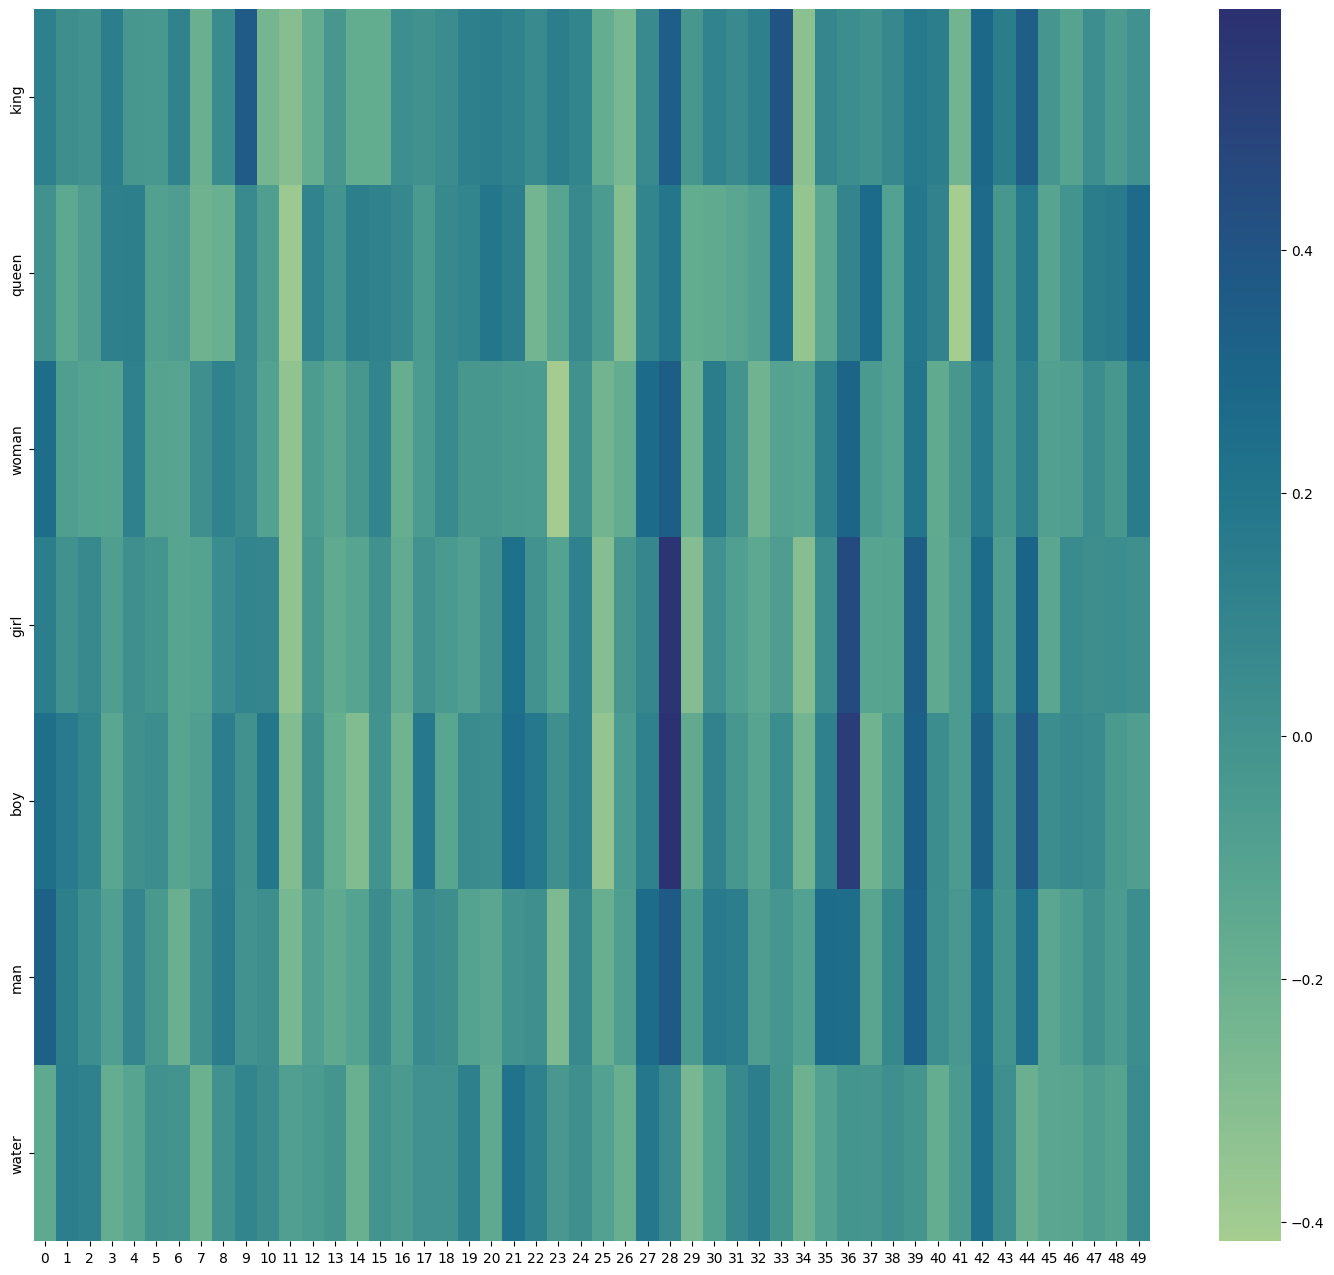

In [21]:
# Create a heatmap

plt.figure(figsize=(18,16))
heatmap = sns.heatmap(df,cmap='crest')
plt.show()

In [ ]:
# correlation among features of boy and girl is more in this way we can draw inferences